<a href="https://colab.research.google.com/github/NayeraHasan/Forecasting-Models-for-Walmart-Data-Driven-Insights/blob/main/Linear_Regression_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


train_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/train.csv"
test_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/test.csv"
stores_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/stores.csv"
features_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/features.csv"



train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
stores = pd.read_csv(stores_path)
features = pd.read_csv(features_path)

# # Preview datasets
# print(train.head())
# print(features.head())
# print(stores.head())



train_features = pd.merge(train, features, on=["Store", "Date"], how="left")


train_features['IsHoliday'] = train_features['IsHoliday_x'] | train_features['IsHoliday_y']
train_features = train_features.drop(columns=['IsHoliday_x', 'IsHoliday_y'], errors='ignore')

train_features['IsHoliday'] = train_features['IsHoliday'].astype(int)


train_full1 = pd.merge(train_features, stores, on="Store", how="left")

markdown_columns = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
train_full1[markdown_columns] = train_full1[markdown_columns].fillna(0)


columns_to_drop = ["CPI", "Fuel_Price", "Unemployment", "Temperature"]
train_full1 = train_full1.drop(columns=columns_to_drop)


print("Updated Dataset Structure:")
print(train_full1.head())
print("Remaining Missing Values:", train_full1.isnull().sum())


Updated Dataset Structure:
   Store  Dept        Date  Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  \
0      1     1  2010-02-05      24924.50        0.0        0.0        0.0   
1      1     1  2010-02-12      46039.49        0.0        0.0        0.0   
2      1     1  2010-02-19      41595.55        0.0        0.0        0.0   
3      1     1  2010-02-26      19403.54        0.0        0.0        0.0   
4      1     1  2010-03-05      21827.90        0.0        0.0        0.0   

   MarkDown4  MarkDown5  IsHoliday Type    Size  
0        0.0        0.0          0    A  151315  
1        0.0        0.0          1    A  151315  
2        0.0        0.0          0    A  151315  
3        0.0        0.0          0    A  151315  
4        0.0        0.0          0    A  151315  
Remaining Missing Values: Store           0
Dept            0
Date            0
Weekly_Sales    0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
IsHoliday       0
Type

In [ ]:

train_full1["Date"] = pd.to_datetime(train_full1["Date"])


train_full1["Year"] = train_full1["Date"].dt.year
train_full1["Month"] = train_full1["Date"].dt.month
train_full1["Week"] = train_full1["Date"].dt.isocalendar().week


train_full1 = pd.get_dummies(train_full1, columns=["Type"], drop_first=True)

train_full1 = train_full1.drop(columns=["Date", "Store", "Dept"])


print(train_full1.head())


   Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0      24924.50        0.0        0.0        0.0        0.0        0.0   
1      46039.49        0.0        0.0        0.0        0.0        0.0   
2      41595.55        0.0        0.0        0.0        0.0        0.0   
3      19403.54        0.0        0.0        0.0        0.0        0.0   
4      21827.90        0.0        0.0        0.0        0.0        0.0   

   IsHoliday    Size  Year  Month  Week  Type_B  Type_C  
0          0  151315  2010      2     5   False   False  
1          1  151315  2010      2     6   False   False  
2          0  151315  2010      2     7   False   False  
3          0  151315  2010      2     8   False   False  
4          0  151315  2010      3     9   False   False  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = train_full1.drop(columns=["Weekly_Sales"])
y = train_full1["Weekly_Sales"]


X_train_val1, X_test1, y_train_val1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Training set size: {X_train1.shape[0]}")
print(f"Validation set size: {X_val1.shape[0]}")
print(f"Test set size: {X_test1.shape[0]}")


model = LinearRegression()
model.fit(X_train1, y_train1)


y_train_pred1 = model.predict(X_train1)
y_val_pred1 = model.predict(X_val1)
y_test_pred1 = model.predict(X_test1)


train_rmse1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
val_rmse1 = np.sqrt(mean_squared_error(y_val1, y_val_pred1))
test_rmse1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))

train1_r2 = r2_score(y_train1, y_train_pred1)
val1_r2 = r2_score(y_val1, y_val_pred1)
test1_r2 = r2_score(y_test1, y_test_pred1)

print(f"Training RMSE: {train_rmse1}, R²: {train1_r2}")
print(f"Validation RMSE: {val_rmse1}, R²: {val1_r2}")
print(f"Test RMSE: {test_rmse1}, R²: {test1_r2}")


Training set size: 252942
Validation set size: 84314
Test set size: 84314
Training RMSE: 21932.451422461178, R²: 0.06333837676996457
Validation RMSE: 22042.57508929758, R²: 0.0598816670476483
Test RMSE: 22080.277078048606, R²: 0.06507045933102351


The high RMSE values and low R² scores across training, validation, and test sets indicate that the linear regression model is not accurately capturing the relationship between the features and the target variable. This suggests that the assumptions of linearity and independence among features may not hold in this context.
The similarity between training and testing RMSE values indicates that the model generalizes well to unseen data, showing no significant overfitting.

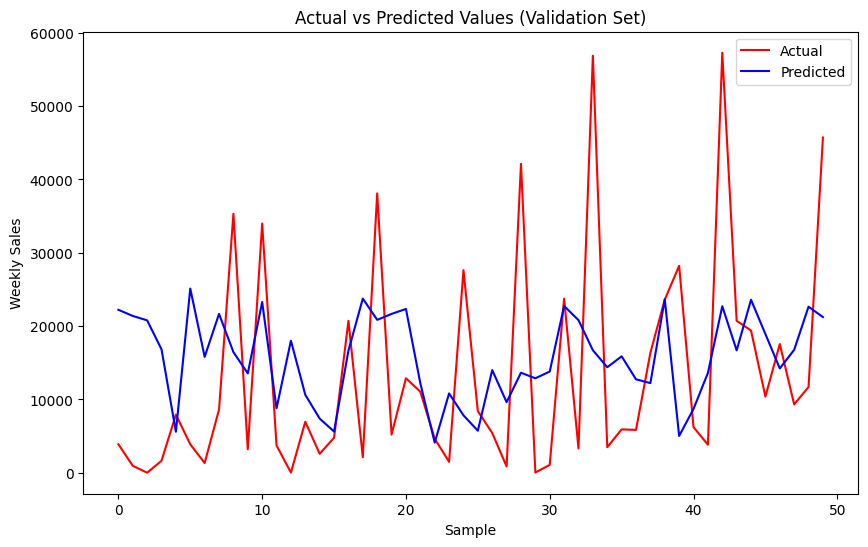

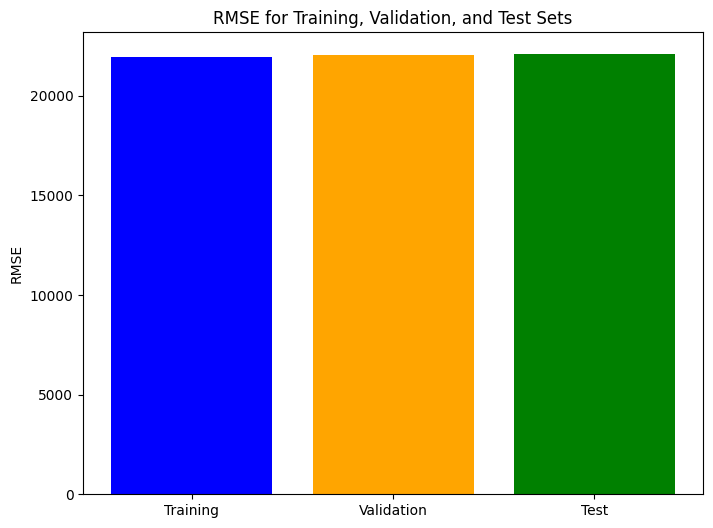

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_val1.values[:50], label='Actual', color='red')
plt.plot(y_val_pred1[:50], label='Predicted', color='blue')
plt.title("Actual vs Predicted Values (Validation Set)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


rmse_values = [train_rmse1, val_rmse1, test_rmse1]
datasets = ['Training', 'Validation', 'Test']

plt.figure(figsize=(8, 6))
plt.bar(datasets, rmse_values, color=['blue', 'orange', 'green'])
plt.title("RMSE for Training, Validation, and Test Sets")
plt.ylabel("RMSE")
plt.show()


Linear Regression assumes a simple, linear relationship between time and sales. However, sales are often influenced by complex, non-linear patterns that depend more on promotions, holidays, and store-specific factors.So i tried to incorporate time-based features within my model , such as lagged features as : Lagged features use past sales to predict current sales, capturing temporal dependencies.

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211

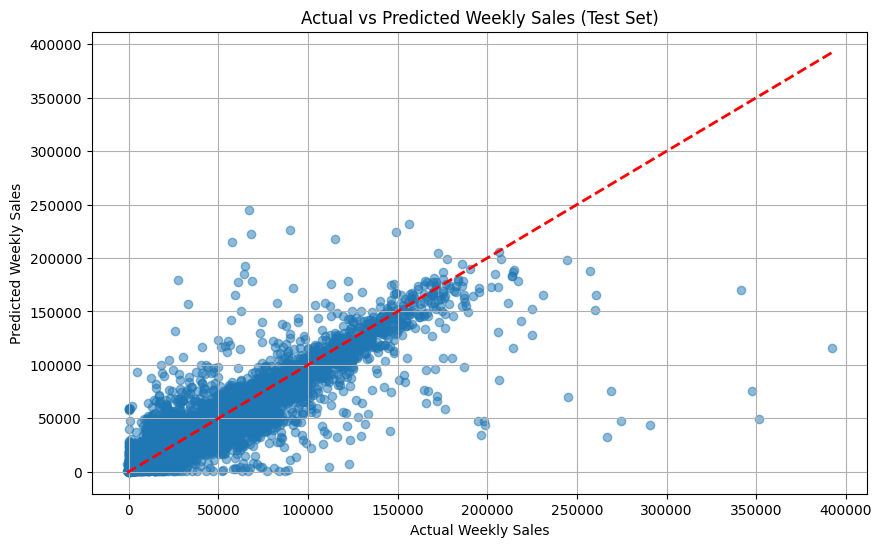

(6834.370835963516, 7283.529603005413, 6722.7410648919795, 0.9112216810583597)

In [ ]:
import pandas as pd
import numpy as np


train_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/train.csv"
test_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/test.csv"
stores_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/stores.csv"
features_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/features.csv"


train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
stores = pd.read_csv(stores_path)
features = pd.read_csv(features_path)


print(train.head())
print(features.head())
print(stores.head())


train_features = pd.merge(train, features, on=["Store", "Date"], how="left")


train_features['IsHoliday'] = train_features['IsHoliday_x'] | train_features['IsHoliday_y']
train_features = train_features.drop(columns=['IsHoliday_x', 'IsHoliday_y'], errors='ignore')


train_features['IsHoliday'] = train_features['IsHoliday'].astype(int)


train_full2 = pd.merge(train_features, stores, on="Store", how="left")


markdown_columns = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
train_full2[markdown_columns] = train_full2[markdown_columns].fillna(0)

# Drop CPI, Fuel_Price, and Unemployment columns
columns_to_drop = ["CPI", "Fuel_Price", "Unemployment", "Temperature"]
train_full2 = train_full2.drop(columns=columns_to_drop)

# Create lagged features for Weekly_Sales (1-week, 2-week, and 3-week lag)
train_full2["Lag_1_Week"] = train_full2["Weekly_Sales"].shift(1)
train_full2["Lag_2_Week"] = train_full2["Weekly_Sales"].shift(2)
train_full2["Lag_3_Week"] = train_full2["Weekly_Sales"].shift(3)

# Fill NaN values in lagged features with 0 (first few rows will have NaN due to shifting)
lagged_columns = ["Lag_1_Week", "Lag_2_Week", "Lag_3_Week"]
train_full2[lagged_columns] = train_full2[lagged_columns].fillna(0)

# Define features and target
X = train_full2[lagged_columns]
y = train_full2["Weekly_Sales"]

# Split dataset
X_train2, X_temp2, y_train2, y_temp2= train_test_split(X, y, test_size=0.3, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train2, y_train2)

# Predictions
y_train_pred2 = model.predict(X_train2)
y_val_pred2 = model.predict(X_val2)
y_test_pred2 = model.predict(X_test2)

# Calculate RMSE
train_rmse2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
val_rmse2 = np.sqrt(mean_squared_error(y_val2, y_val_pred2))
test_rmse2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
r22 = r2_score(y_test2, y_test_pred2 )

# Plot actual vs predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred2, alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Weekly Sales (Test Set)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.grid(True)
plt.show()

train_rmse2, val_rmse2, test_rmse2,r22


The Root Mean Squared Error (RMSE) decreased to approximately 6,834, and the R² value increased to about 0.911. This enhancement indicates that the model now captures temporal dependencies more effectively, as it leverages historical data to predict future values.

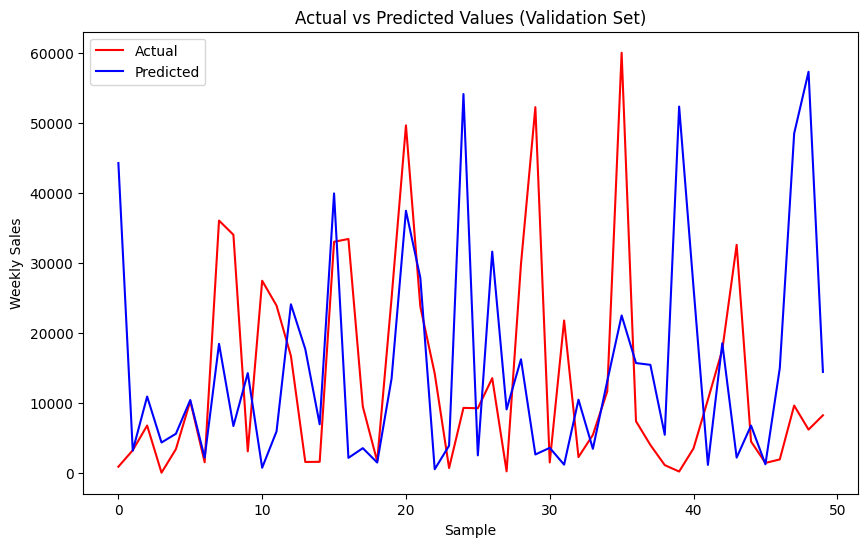

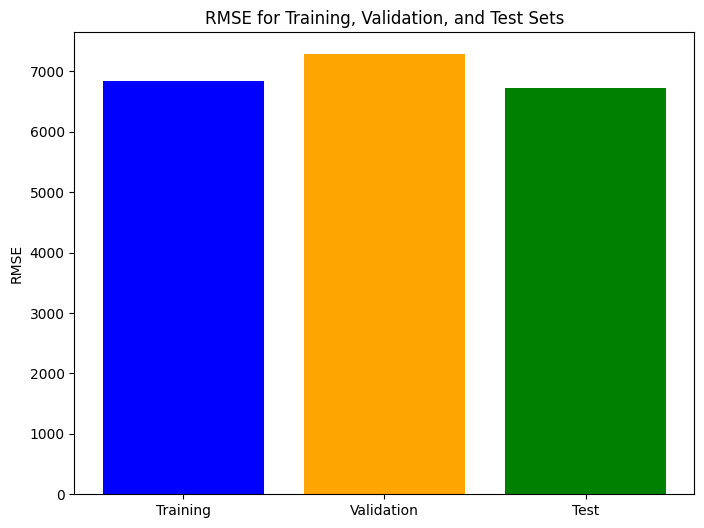

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_val2.values[:50], label='Actual', color='red')
plt.plot(y_pred2[:50], label='Predicted', color='blue')
plt.title("Actual vs Predicted Values (Validation Set)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


rmse_values = [train_rmse2, val_rmse2, test_rmse2]
datasets = ['Training', 'Validation', 'Test']

plt.figure(figsize=(8, 6))
plt.bar(datasets, rmse_values, color=['blue', 'orange', 'green'])
plt.title("RMSE for Training, Validation, and Test Sets")
plt.ylabel("RMSE")
plt.show()

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211

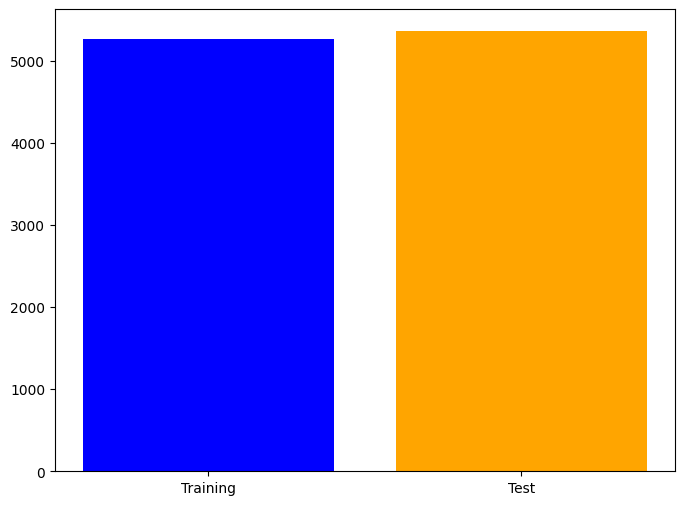

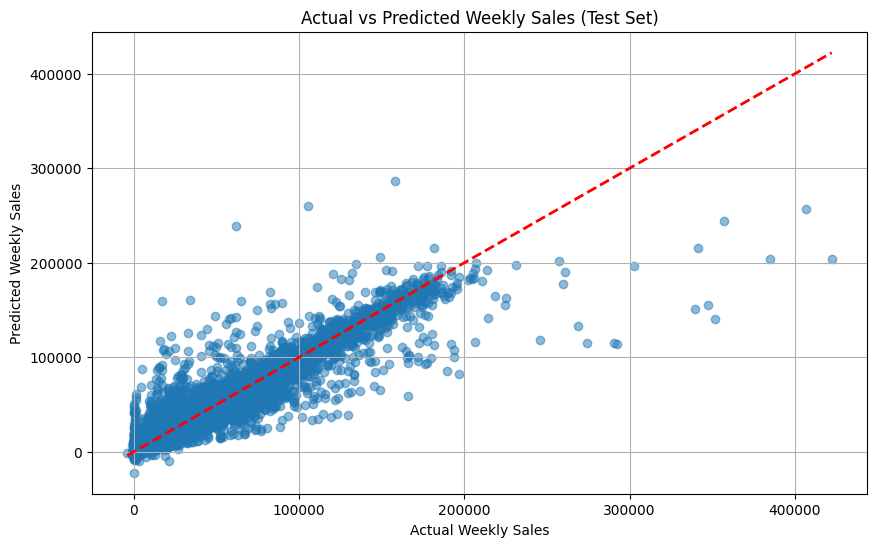

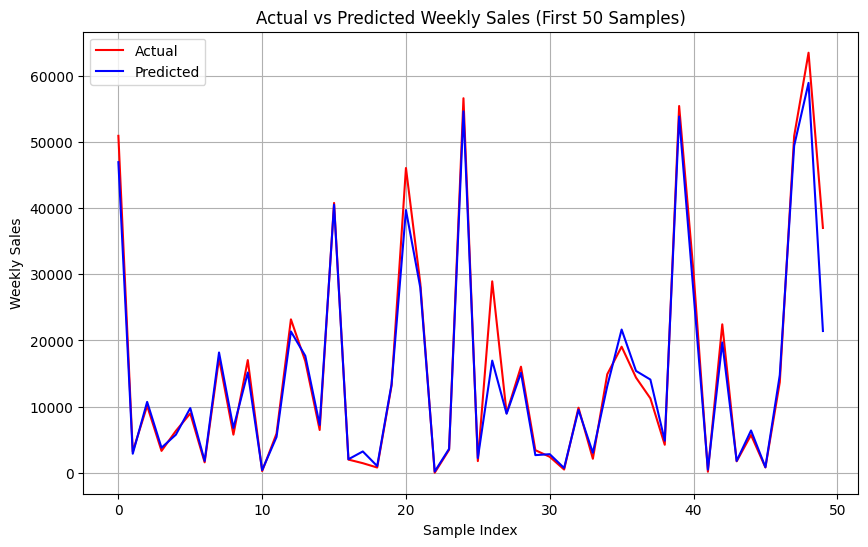

In [ ]:
import pandas as pd
import numpy as np

# File paths
train_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/train.csv"
test_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/test.csv"
stores_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/stores.csv"
features_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/features.csv"

# Load the data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
stores = pd.read_csv(stores_path)
features = pd.read_csv(features_path)

# Preview datasets
print(train.head())
print(features.head())
print(stores.head())

train_features = pd.merge(train, features, on=["Store", "Date"], how="left")

# Combine the IsHoliday columns (from train and features) and remove duplicates
train_features['IsHoliday'] = train_features['IsHoliday_x'] | train_features['IsHoliday_y']
train_features = train_features.drop(columns=['IsHoliday_x', 'IsHoliday_y'], errors='ignore')

# Convert IsHoliday to numeric (1 for True, 0 for False)
train_features['IsHoliday'] = train_features['IsHoliday'].astype(int)

# Merge the result with Stores on Store
train_full3 = pd.merge(train_features, stores, on="Store", how="left")

# Replace NaN values in MarkDown columns with 0
markdown_columns = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
train_full3[markdown_columns] = train_full3[markdown_columns].fillna(0)

# Drop CPI, Fuel_Price, and Unemployment columns
columns_to_drop = ["CPI", "Fuel_Price", "Unemployment", "Temperature"]
train_full3 = train_full3.drop(columns=columns_to_drop)

# Create rolling average features for Weekly_Sales (4-week and 8-week rolling averages)
train_full3["Rolling_4_Week"] = train_full3["Weekly_Sales"].rolling(window=4, min_periods=1).mean()
train_full3["Rolling_8_Week"] = train_full3["Weekly_Sales"].rolling(window=8, min_periods=1).mean()

# Fill NaN values in rolling averages (although min_periods=1 minimizes this issue)
train_full3[["Rolling_4_Week", "Rolling_8_Week"]] = train_full3[["Rolling_4_Week", "Rolling_8_Week"]].fillna(0)

# Define features (X) and target (y)
X = train_full3[["Rolling_4_Week", "Rolling_8_Week"]]
y = train_full3["Weekly_Sales"]

# Split data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train3, y_train3)

# Predictions
y_train_pred3 = model.predict(X_train3)
y_test_pred3= model.predict(X_test3)

# Calculate RMSE and R²
rmse_train3 = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
r_train3 = r2_score(y_train3, y_train_pred3)
r_test3 = r2_score(y_test3, y_test_pred3)

# Print metrics
print(f"Train RMSE: {rmse_train3}, Train R²: {r_train3}")
print(f"Test RMSE: {rmse_test3}, Test R²: {r_test3}")

rmse_values = [rmse_train3,rmse_test3]
datasets = ['Training', 'Test']

plt.figure(figsize=(8, 6))
plt.bar(datasets, rmse_values, color=['blue', 'orange'])

# Plot Actual vs Predicted
import matplotlib.pyplot as plt

# Select the first 50 values for actual and predicted weekly sales
actual_values = y_test3.values[:50]
predicted_values = y_test_pred3[:50]


# Plot actual vs predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_test_pred3, alpha=0.5)
plt.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Weekly Sales (Test Set)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.grid(True)
plt.show()
# Create a line plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual", color="red")
plt.plot(predicted_values, label="Predicted", color="blue")
plt.title("Actual vs Predicted Weekly Sales (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

The Root Mean Squared Error (RMSE) decreased to approximately 5358.23, and the R² value increased to about 0.94. This is a huge improvement from linear regresssion without time-based features but only a slight improvemnt from the lagged features !

The following was a linear regression model ran with all the added improvements in the features such as lagged features, rolling averages and cyclic features. As well as the scaling of numerical features and the one-hot encodeing of categorical ones

Train MAE: 1836.4531909464026, Test MAE: 1875.6135359196235
Train Normalized RMSE: 0.3245, Test Normalized RMSE: 0.3300, Test Normalized MAE: 0.1173
Train RMSE: 5185.08311951341, R²: 0.9477328233915326
Test RMSE: 5276.92663898684, R²: 0.9466011434316224


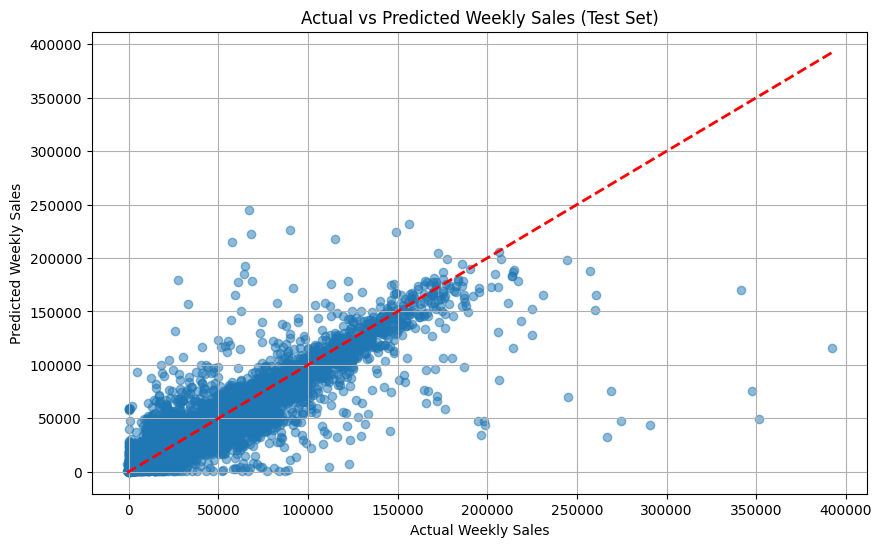

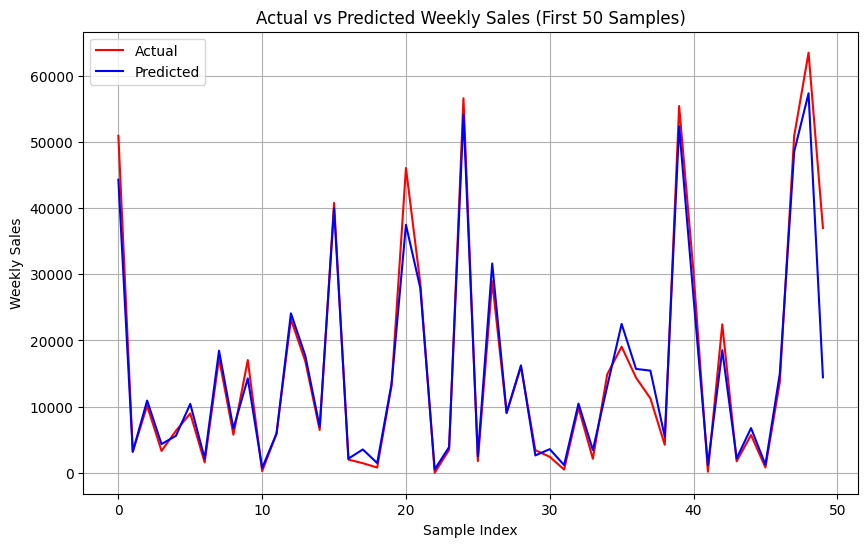

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


train_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/train.csv"
test_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/test.csv"
stores_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/stores.csv"
features_path = "/Users/winniebrendawaiya/Desktop/Walmart_data/features.csv"

train = pd.read_csv(train_path)
stores = pd.read_csv(stores_path)
features = pd.read_csv(features_path)


train_features = pd.merge(train, features, on=["Store", "Date"], how="left")
train_features['IsHoliday'] = train_features['IsHoliday_x'] | train_features['IsHoliday_y']
train_features = train_features.drop(columns=['IsHoliday_x', 'IsHoliday_y'], errors='ignore')
train_features['IsHoliday'] = train_features['IsHoliday'].astype(int)
train_full = pd.merge(train_features, stores, on="Store", how="left")


markdown_columns = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
train_full[markdown_columns] = train_full[markdown_columns].fillna(0)

# rolling averages
train_full["Rolling_4_Week"] = train_full["Weekly_Sales"].rolling(window=4, min_periods=1).mean()
train_full["Rolling_8_Week"] = train_full["Weekly_Sales"].rolling(window=8, min_periods=1).mean()

# Cyclic encodings for Week and Month
train_full["Date"] = pd.to_datetime(train_full["Date"])
train_full["Month"] = train_full["Date"].dt.month
train_full["Week"] = train_full["Date"].dt.isocalendar().week
train_full["Month_sin"] = np.sin(2 * np.pi * train_full["Month"] / 12)
train_full["Month_cos"] = np.cos(2 * np.pi * train_full["Month"] / 12)
train_full["Week_sin"] = np.sin(2 * np.pi * train_full["Week"] / 52)
train_full["Week_cos"] = np.cos(2 * np.pi * train_full["Week"] / 52)


feature_columns = [
    "Store", "Dept", "IsHoliday", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5",
    "Rolling_4_Week", "Rolling_8_Week", "Size", "Month_sin", "Month_cos", "Week_sin", "Week_cos"
]
X = train_full[feature_columns]
y = train_full["Weekly_Sales"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Encode categorical variables, scale numerical features
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Rolling_4_Week", "Rolling_8_Week", "Size"]),
    ("onehot", OneHotEncoder(), ["Store", "Dept"])
])

# pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])


pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mean Absolute Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Normalized RMSE
normalized_rmse_train = train_rmse / y_train.mean()
normalized_rmse_test = test_rmse / y_test.mean()
normalized_mae_test = mae_test / y_test.mean()

# Print results
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train Normalized RMSE: {normalized_rmse_train:.4f}, Test Normalized RMSE: {normalized_rmse_test:.4f}, Test Normalized MAE: {normalized_mae_test:.4f}")

print(f"Train RMSE: {train_rmse}, R²: {r2_train}")
print(f"Test RMSE: {test_rmse}, R²: {r2_test}")

# Plot Actual vs Predicted
import matplotlib.pyplot as plt


actual_values = y_test.values[:50]
predicted_values = y_pred[:50]

# Plot actual vs predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred2, alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Weekly Sales (Test Set)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual", color="red")
plt.plot(predicted_values, label="Predicted", color="blue")
plt.title("Actual vs Predicted Weekly Sales (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


The low error values and high R² scores reflect that the linear regression model is effectively leveraging the engineered features to predict weekly sales.
While performance is strong, further exploration (e.g., non-linear models like Random Forests or Gradient Boosting) may capture more complex relationships between features for further improvement.